In [86]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
os.chdir(os.path.dirname(os.path.abspath("__file__")))
df = pd.read_csv('./test.csv', header=0, encoding='utf-8')
df['date'] = pd.to_datetime(df['date'])
df['col_3'] = df['col_1'] * df['col_2']
df

,date,id,col_1,col_2,col_3
0,2021-01-09,1,50,1000,50000
1,2021-01-10,2,100,1000,100000
2,2021-01-11,2,100,1000,100000
3,2021-01-12,3,150,1000,150000
4,2021-01-13,3,150,1000,150000
5,2021-01-14,3,150,1000,150000
6,2021-01-15,1,50,1000,50000
7,2021-01-16,1,50,2000,100000
8,2021-01-17,2,100,2000,200000
9,2021-01-18,3,150,2000,300000


In [88]:
# MultiIndex にせず、日付列のみをIndexに指定した場合
df = df.set_index(['date'])
df[df.index.day==15]

,id,col_1,col_2,col_3
date,,,,
2021-01-15,1,50,1000,50000


In [89]:
# df = df.reset_index().set_index(['date', 'id'])
# print(df[df.index.day==15])
# 
# Attribute error: 'MultiIndex' object has no attribute 'day'

In [90]:
# MultiIndex Dataframe
df = df.reset_index()
df = df.set_index(['date'])
df = df.set_index([df.index.year, df.index.month, df.index.day, df.index, 'id'])
df.index.names = ['year', 'month', 'day', 'date', 'id']
df.sort_index()
df

col_1  col_2   col_3
year month day date       id                      
2021 1     9   2021-01-09 1      50   1000   50000
           10  2021-01-10 2     100   1000  100000
           11  2021-01-11 2     100   1000  100000
           12  2021-01-12 3     150   1000  150000
           13  2021-01-13 3     150   1000  150000
           14  2021-01-14 3     150   1000  150000
           15  2021-01-15 1      50   1000   50000
           16  2021-01-16 1      50   2000  100000
           17  2021-01-17 2     100   2000  200000
           18  2021-01-18 3     150   2000  300000
           19  2021-01-19 2     100   2000  200000
           20  2021-01-20 1      50   2000  100000
           21  2021-01-21 3     150   2000  300000
           22  2021-01-22 1      50   2000  100000
           23  2021-01-23 2     100   2000  200000
           24  2021-01-24 2     100   2000  200000
           25  2021-01-25 3     150   2000  300000
           26  2021-01-26 3     150   2000  300000
           27  2021-01-27 3     150   2000  300000
           28  2021-01-28 1      50   2000  100000
           29  2021-01-29 1      50   3000  150000
           30  2021-01-30 2     100   3000  300000
           31  2021-01-31 3     150   3000  450000
     2     1   2021-02-01 2     100   3000  300000
           2   2021-02-02 1      50   3000  150000
           3   2021-02-03 3     150   3000  450000
           4   2021-02-04 1      50   3000  150000
           5   2021-02-05 2     100   3000  300000
           6   2021-02-06 2     100   3000  300000
           7   2021-02-07 3     150   3000  450000
           8   2021-02-08 3     150   3000  450000
           9   2021-02-09 3     150   3000  450000
           10  2021-02-10 1      50   3000  150000

In [91]:
df.sort_index(level=['day', 'month'])

col_1  col_2   col_3
year month day date       id                      
2021 2     1   2021-02-01 2     100   3000  300000
           2   2021-02-02 1      50   3000  150000
           3   2021-02-03 3     150   3000  450000
           4   2021-02-04 1      50   3000  150000
           5   2021-02-05 2     100   3000  300000
           6   2021-02-06 2     100   3000  300000
           7   2021-02-07 3     150   3000  450000
           8   2021-02-08 3     150   3000  450000
     1     9   2021-01-09 1      50   1000   50000
     2     9   2021-02-09 3     150   3000  450000
     1     10  2021-01-10 2     100   1000  100000
     2     10  2021-02-10 1      50   3000  150000
     1     11  2021-01-11 2     100   1000  100000
           12  2021-01-12 3     150   1000  150000
           13  2021-01-13 3     150   1000  150000
           14  2021-01-14 3     150   1000  150000
           15  2021-01-15 1      50   1000   50000
           16  2021-01-16 1      50   2000  100000
           17  2021-01-17 2     100   2000  200000
           18  2021-01-18 3     150   2000  300000
           19  2021-01-19 2     100   2000  200000
           20  2021-01-20 1      50   2000  100000
           21  2021-01-21 3     150   2000  300000
           22  2021-01-22 1      50   2000  100000
           23  2021-01-23 2     100   2000  200000
           24  2021-01-24 2     100   2000  200000
           25  2021-01-25 3     150   2000  300000
           26  2021-01-26 3     150   2000  300000
           27  2021-01-27 3     150   2000  300000
           28  2021-01-28 1      50   2000  100000
           29  2021-01-29 1      50   3000  150000
           30  2021-01-30 2     100   3000  300000
           31  2021-01-31 3     150   3000  450000

In [92]:
# <class 'pandas.core.frame.DataFrame'>
df.reset_index()


,year,month,day,date,id,col_1,col_2,col_3
0,2021,1,9,2021-01-09,1,50,1000,50000
1,2021,1,10,2021-01-10,2,100,1000,100000
2,2021,1,11,2021-01-11,2,100,1000,100000
3,2021,1,12,2021-01-12,3,150,1000,150000
4,2021,1,13,2021-01-13,3,150,1000,150000
5,2021,1,14,2021-01-14,3,150,1000,150000
6,2021,1,15,2021-01-15,1,50,1000,50000
7,2021,1,16,2021-01-16,1,50,2000,100000
8,2021,1,17,2021-01-17,2,100,2000,200000
9,2021,1,18,2021-01-18,3,150,2000,300000


In [93]:
df.groupby(['year', 'month']).groups

{(2021,
  1): MultiIndex(levels=[[2021], [1, 2], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], [2021-01-09 00:00:00, 2021-01-10 00:00:00, 2021-01-11 00:00:00, 2021-01-12 00:00:00, 2021-01-13 00:00:00, 2021-01-14 00:00:00, 2021-01-15 00:00:00, 2021-01-16 00:00:00, 2021-01-17 00:00:00, 2021-01-18 00:00:00, 2021-01-19 00:00:00, 2021-01-20 00:00:00, 2021-01-21 00:00:00, 2021-01-22 00:00:00, 2021-01-23 00:00:00, 2021-01-24 00:00:00, 2021-01-25 00:00:00, 2021-01-26 00:00:00, 2021-01-27 00:00:00, 2021-01-28 00:00:00, 2021-01-29 00:00:00, 2021-01-30 00:00:00, 2021-01-31 00:00:00, 2021-02-01 00:00:00, 2021-02-02 00:00:00, 2021-02-03 00:00:00, 2021-02-04 00:00:00, 2021-02-05 00:00:00, 2021-02-06 00:00:00, 2021-02-07 00:00:00, 2021-02-08 00:00:00, 2021-02-09 00:00:00, 2021-02-10 00:00:00], [1, 2, 3]],
            codes=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [94]:
df.groupby(['year', 'month']).get_group((2021, 2))

col_1  col_2   col_3
year month day date       id                      
2021 2     1   2021-02-01 2     100   3000  300000
           2   2021-02-02 1      50   3000  150000
           3   2021-02-03 3     150   3000  450000
           4   2021-02-04 1      50   3000  150000
           5   2021-02-05 2     100   3000  300000
           6   2021-02-06 2     100   3000  300000
           7   2021-02-07 3     150   3000  450000
           8   2021-02-08 3     150   3000  450000
           9   2021-02-09 3     150   3000  450000
           10  2021-02-10 1      50   3000  150000

In [95]:
print(df.groupby(['year', 'month']).get_group((2021, 2)).index.names)

['year', 'month', 'day', 'date', 'id']


In [96]:
df.xs(2021, level='year').xs(2, level='month')

,,,col_1,col_2,col_3
day,date,id,,,
1,2021-02-01,2,100,3000,300000
2,2021-02-02,1,50,3000,150000
3,2021-02-03,3,150,3000,450000
4,2021-02-04,1,50,3000,150000
5,2021-02-05,2,100,3000,300000
6,2021-02-06,2,100,3000,300000
7,2021-02-07,3,150,3000,450000
8,2021-02-08,3,150,3000,450000
9,2021-02-09,3,150,3000,450000


In [97]:
print(df.xs(2021, level='year').xs(2, level='month').index.names)

['day', 'date', 'id']


In [98]:
df.loc[(2021, 2), 'col_3']

day  date        id
1    2021-02-01  2     300000
2    2021-02-02  1     150000
3    2021-02-03  3     450000
4    2021-02-04  1     150000
5    2021-02-05  2     300000
6    2021-02-06  2     300000
7    2021-02-07  3     450000
8    2021-02-08  3     450000
9    2021-02-09  3     450000
10   2021-02-10  1     150000
Name: col_3, dtype: int64

In [99]:
print(df.loc[(2021, 2), 'col_3'].index.names)

['day', 'date', 'id']


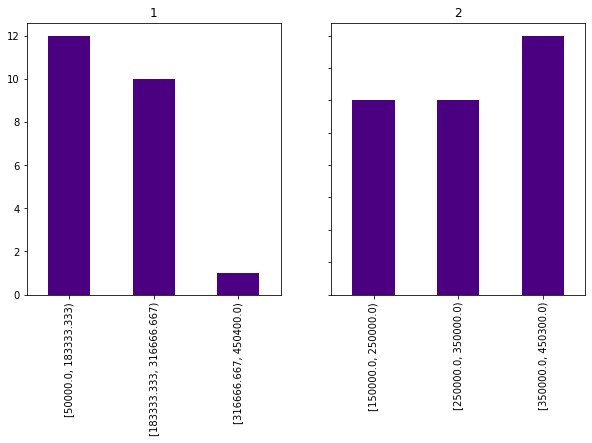

In [100]:
# histogram
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

for i, month in enumerate(df.index.unique(level='month')):
    ax[i].set_title(str(month))
    pd.cut(
        # 2021年の月ごとに、col_3をヒストグラムで表示
        df.groupby(['year', 'month']).get_group((2021, month))['col_3'],
        bins=3,     # 階級数
        right=False # True: aより大きくb以下; False: a以上b未満
    ) \
    .value_counts() \
    .sort_index() \
    .plot.bar(color='indigo', ax=ax[i], sharex=True, sharey=True)
plt.show()

<AxesSubplot:title={'center':'col_3'}, xlabel='month'>

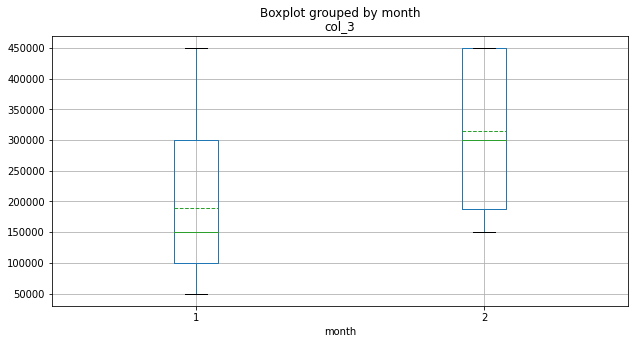

In [101]:
df.groupby('year').get_group(2021).boxplot(
    column='col_3',
    by='month',
    figsize=(10, 5),
    meanline=True,
    showmeans=True,
    showcaps=True,
    showbox=True,
    showfliers=False
)